Non_seasonal_ Project Topic name:-U.S. Gasoline and Diesel Retail Prices 1995-2021

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_gas=pd.read_csv('C:/Users/mehul/OneDrive/Desktop/test jupyter/PET_PRI_GND_DCUS_NUS_W.csv')
df_gas.head()

Date     A1     A2     A3     R1     R2     R3     M1     M2     M3  \
0  01/02/1995  1.127  1.104  1.231  1.079  1.063  1.167  1.170  1.159  1.298   
1  01/09/1995  1.134  1.111  1.232  1.086  1.070  1.169  1.177  1.164  1.300   
2  01/16/1995  1.126  1.102  1.231  1.078  1.062  1.169  1.168  1.155  1.299   
3  01/23/1995  1.132  1.110  1.226  1.083  1.068  1.165  1.177  1.165  1.296   
4  01/30/1995  1.131  1.109  1.221  1.083  1.068  1.162  1.176  1.163  1.291   

      P1     P2     P3     D1  
0  1.272  1.250  1.386  1.104  
1  1.279  1.256  1.387  1.102  
2  1.271  1.249  1.385  1.100  
3  1.277  1.256  1.378  1.095  
4  1.275  1.255  1.370  1.090

In [3]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [4]:
df_gas.describe()

A1           A2           A3           R1           R2  \
count  1361.000000  1361.000000  1361.000000  1361.000000  1361.000000   
mean      2.285680     2.234511     2.396873     2.225170     2.178511   
std       0.859028     0.843815     0.883311     0.850143     0.835549   
min       0.949000     0.926000     1.039000     0.907000     0.885000   
25%       1.461000     1.433000     1.550000     1.421000     1.393000   
50%       2.326000     2.251000     2.458000     2.237000     2.175000   
75%       2.903000     2.825000     3.060000     2.828000     2.765000   
max       4.165000     4.102000     4.301000     4.114000     4.054000   

                R3           M1           M2           M3           P1  \
count  1361.000000  1361.000000  1361.000000  1361.000000  1361.000000   
mean      2.329126     2.382822     2.320970     2.508877     2.519840   
std       0.876739     0.882107     0.858521     0.908861     0.911055   
min       0.974000     1.008000     0.979000     1.112000     1.100000   
25%       1.489000     1.517000     1.482000     1.616000     1.607000   
50%       2.367000     2.481000     2.404000     2.627000     2.693000   
75%       2.976000     3.033000     2.930000     3.206000     3.209000   
max       4.247000     4.229000     4.153000     4.387000     4.344000   

                P2           P3           D1  
count  1361.000000  1361.000000  1361.000000  
mean      2.472096     2.609244     2.404699  
std       0.894472     0.925587     0.998646  
min       1.074000     1.191000     0.953000  
25%       1.573000     1.695000     1.418000  
50%       2.640000     2.769000     2.479000  
75%       3.127000     3.318000     3.070000  
max       4.283000     4.459000     4.764000

In [5]:
df_gas.isnull().any()

Date    False
A1      False
A2      False
A3      False
R1      False
R2      False
R3      False
M1      False
M2      False
M3      False
P1      False
P2      False
P3      False
D1      False
dtype: bool

In [6]:
df_gas.dtypes

Date     object
A1      float64
A2      float64
A3      float64
R1      float64
R2      float64
R3      float64
M1      float64
M2      float64
M3      float64
P1      float64
P2      float64
P3      float64
D1      float64
dtype: object

In [7]:
df_gas.iloc[:, 0] = df_gas.iloc[:, 0].astype('datetime64[ns]').dropna()
df = df_gas.iloc[:, 1:]
date = df_gas.iloc[:, 0]

In [8]:
fig = px.line(df_gas, x='Date', y=df_gas.columns[1:],
              hover_data={"Date": "|%B %d, %Y"},
              title='U.S Gaz over years')

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(12)]},
                           {"title": "all U.S gaz over years",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(12)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(df.columns[1:])])
            )])

fig.show()

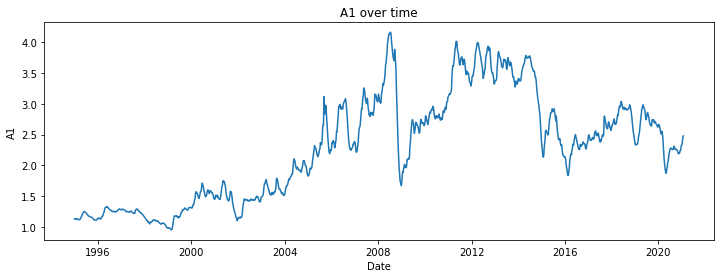

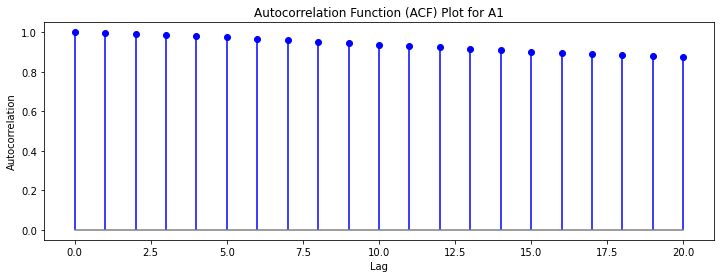

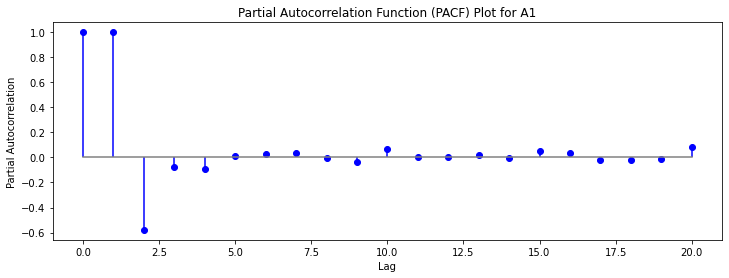

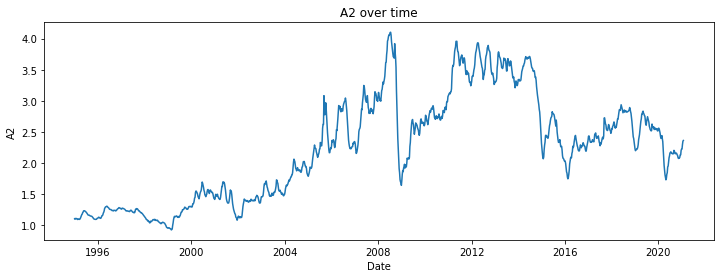

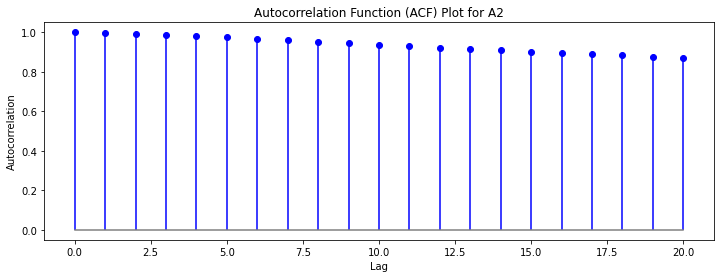

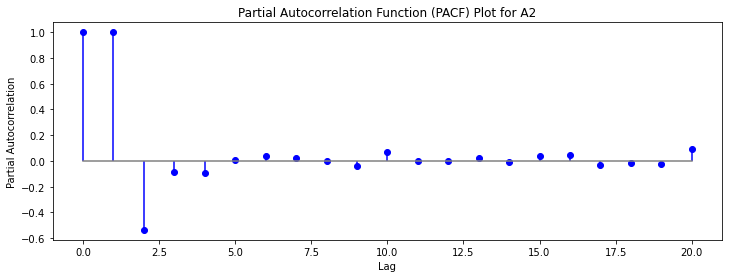

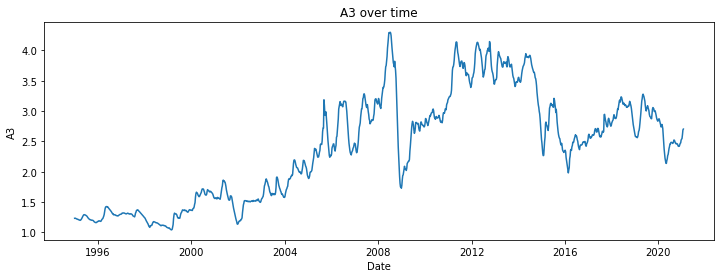

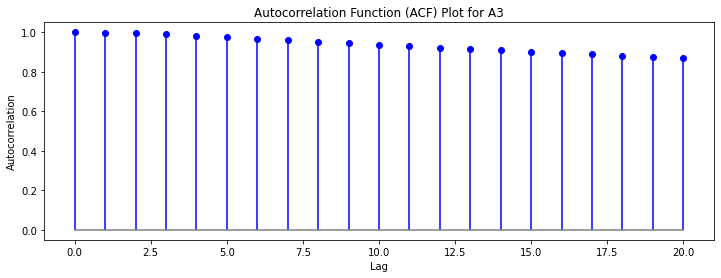

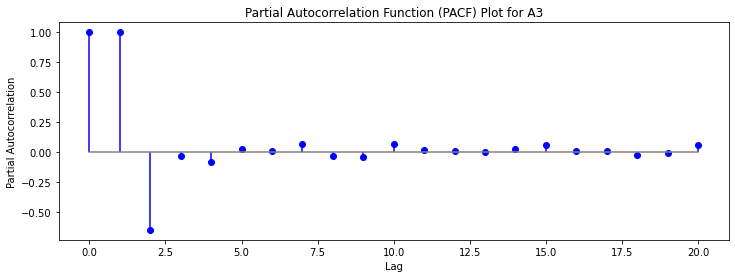

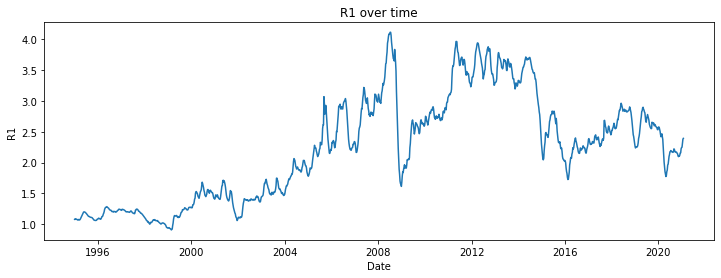

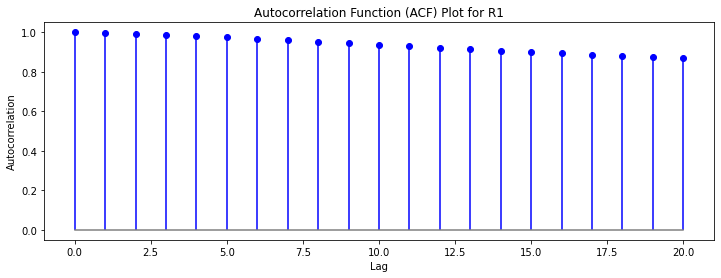

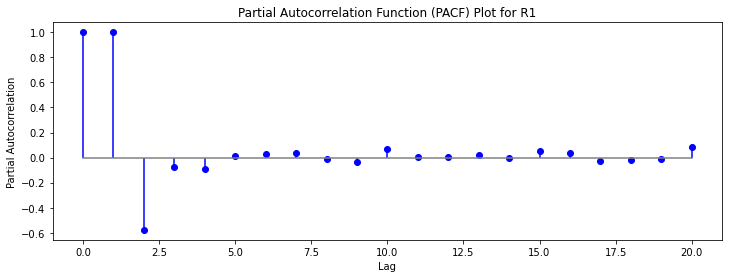

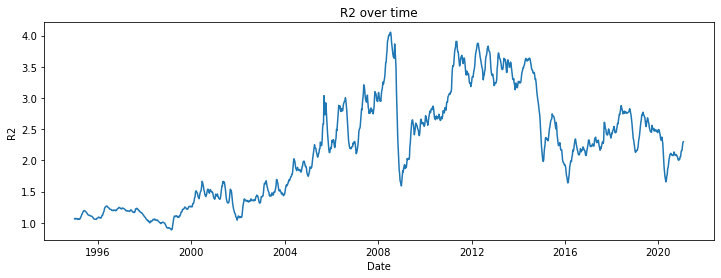

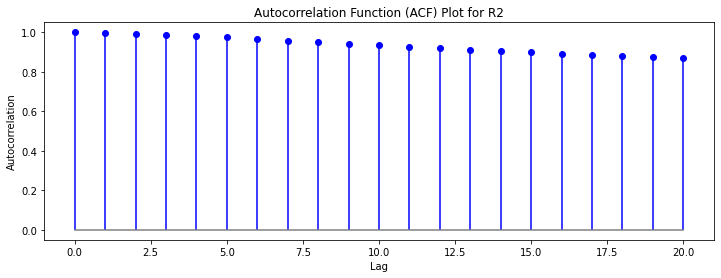

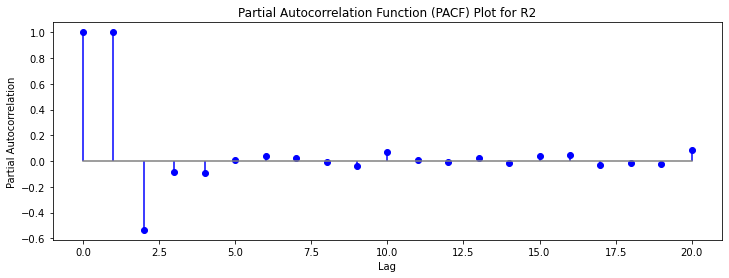

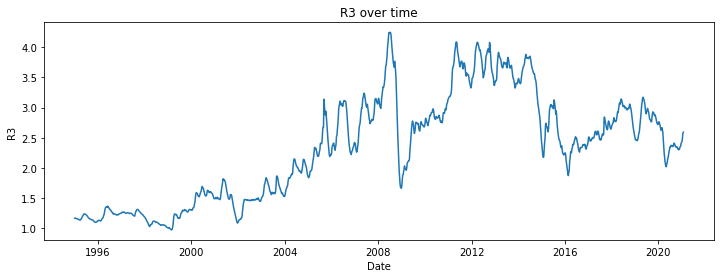

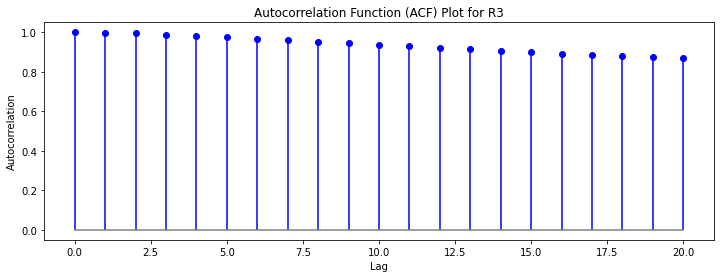

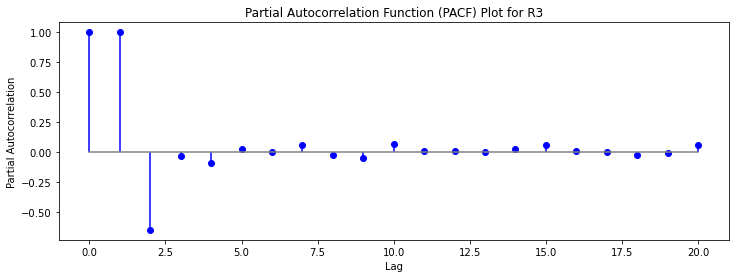

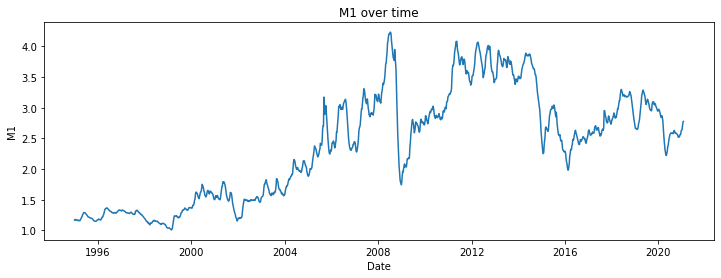

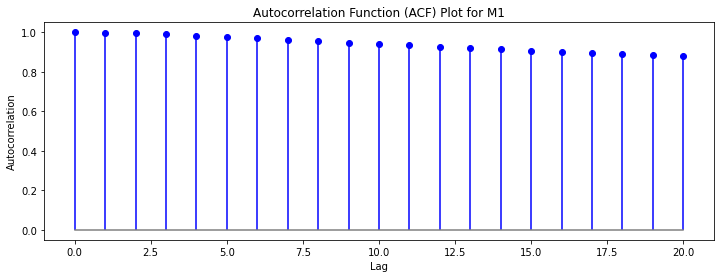

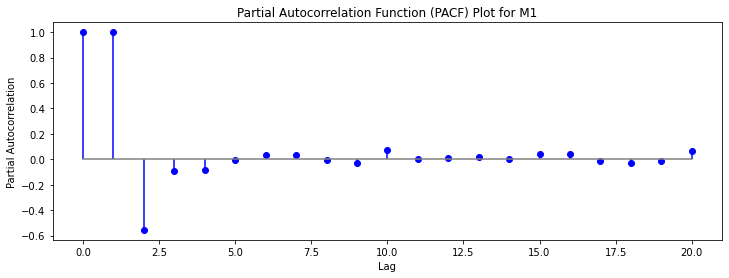

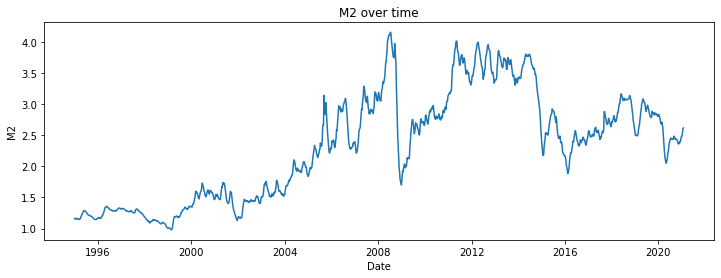

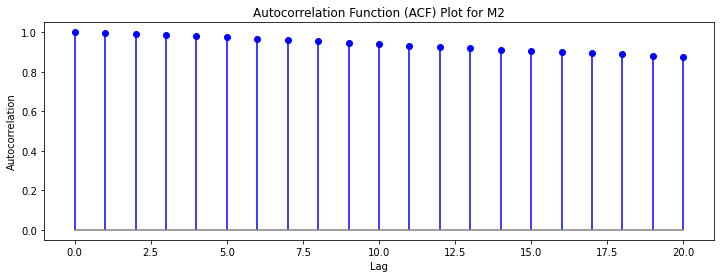

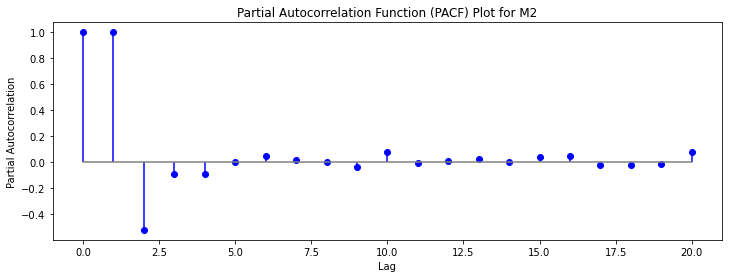

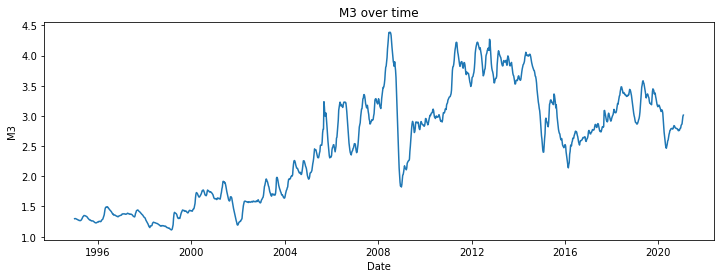

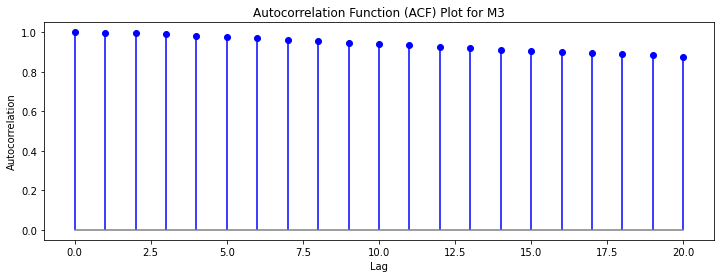

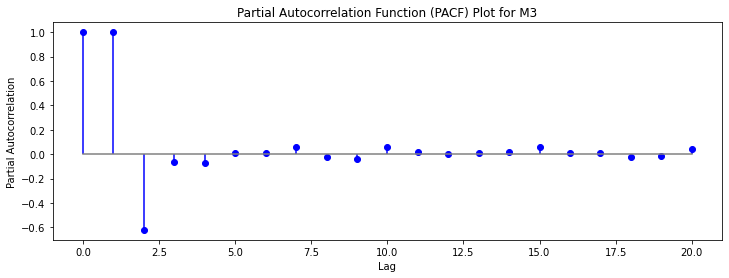

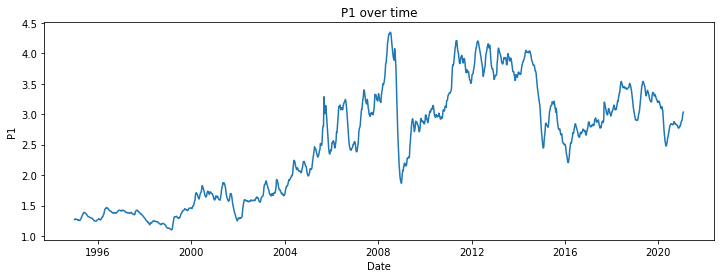

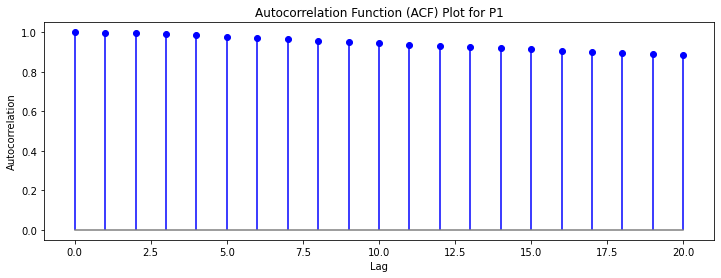

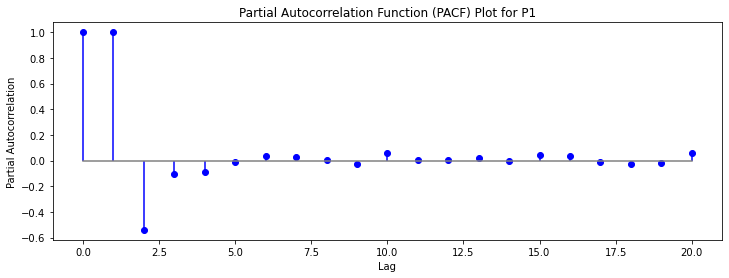

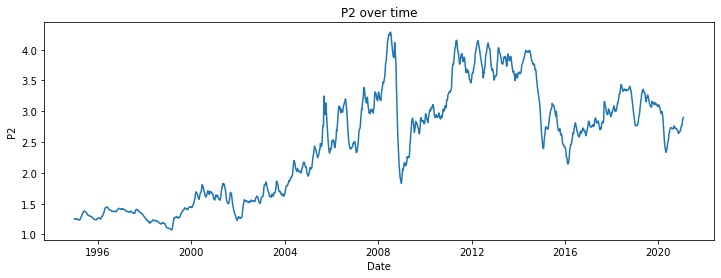

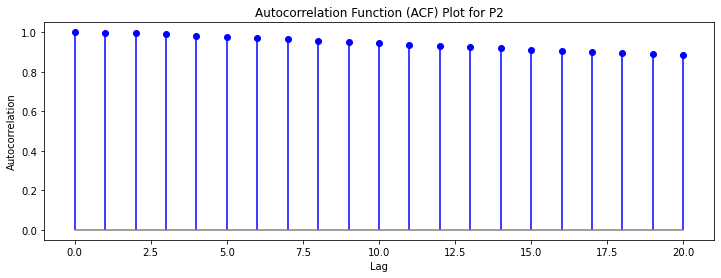

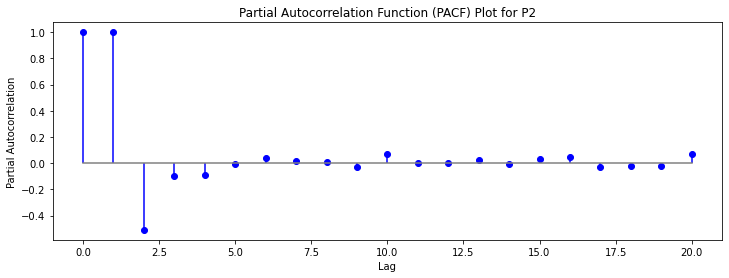

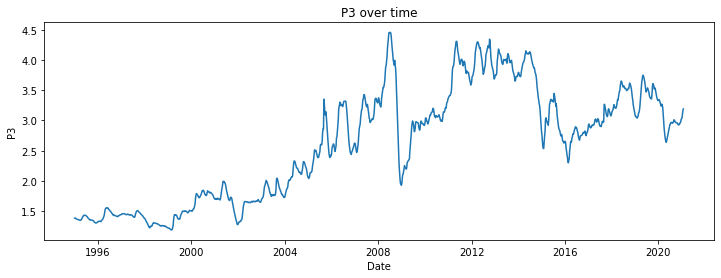

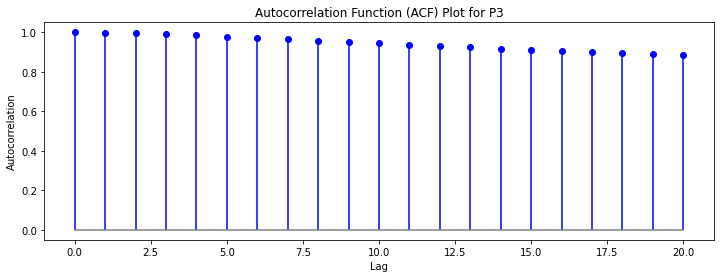

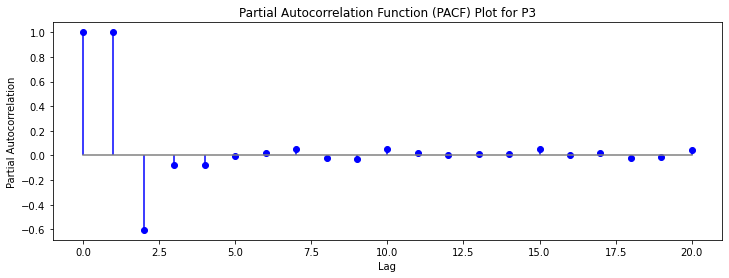

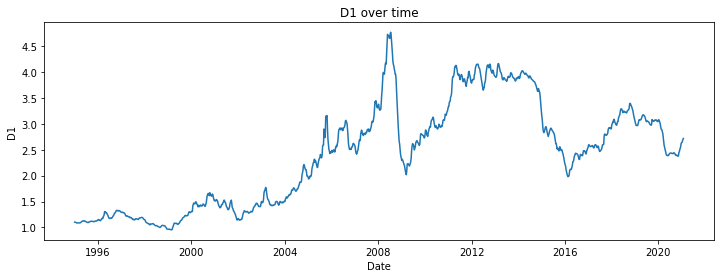

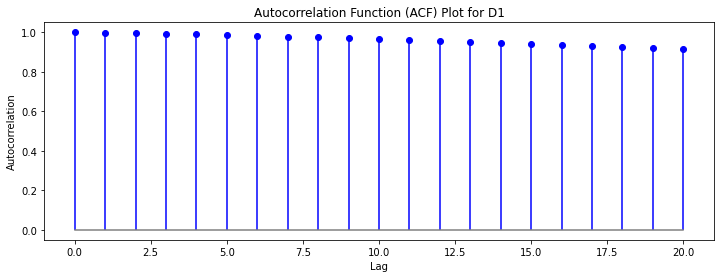

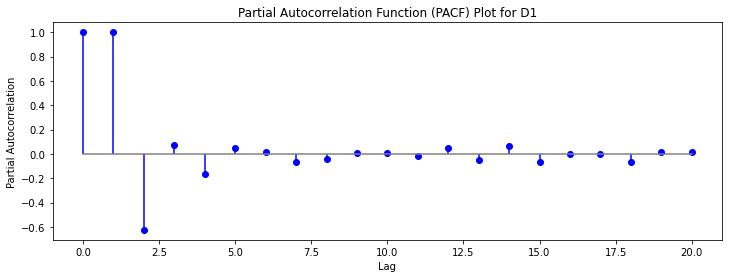

In [49]:
df_gas['Date'] = pd.to_datetime(df_gas['Date'], format='%m/%d/%Y')

for column_of_interest in df_gas.columns[1:]:
    # Plot the time series
    plt.figure(figsize=(12, 4))
    plt.plot(df_gas['Date'], df_gas[column_of_interest])
    plt.title(f'{column_of_interest} over time')
    plt.xlabel('Date')
    plt.ylabel(column_of_interest)
    plt.show()
    
    # ACF and PACF plots
    lags = 20
    acf_values = acf(df_gas[column_of_interest], nlags=lags)
    pacf_values = pacf(df_gas[column_of_interest], nlags=lags)

    # Plot ACF
    plt.figure(figsize=(12, 4))
    plt.stem(range(lags+1), acf_values, markerfmt='bo', linefmt='b-', basefmt='gray')
    plt.title(f'Autocorrelation Function (ACF) Plot for {column_of_interest}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

    # Plot PACF
    plt.figure(figsize=(12, 4))
    plt.stem(range(lags+1), pacf_values, markerfmt='bo', linefmt='b-', basefmt='gray')
    plt.title(f'Partial Autocorrelation Function (PACF) Plot for {column_of_interest}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

1.Stationarity check: To check whether it is stationary or not

In [50]:
# Augmented Dickey-Fuller test
result_adf = adfuller(df_gas.drop('Date', axis=1).stack().dropna())
test_statistic, p_value, _, _, _, _ = result_adf
print(f'Augmented Dickey-Fuller Test Statistic for the entire dataset: {test_statistic}')
print(f'P-value for the entire dataset: {p_value}')


if p_value <= 0.05:
    print('Reject the null hypothesis. The entire dataset is likely stationary.')
else:
    print('Fail to reject the null hypothesis. The entire dataset is likely non-stationary.')

Augmented Dickey-Fuller Test Statistic for the entire dataset: -2.434702564634407
P-value for the entire dataset: 0.13218040988219915
Fail to reject the null hypothesis. The entire dataset is likely non-stationary.


2. Different Window

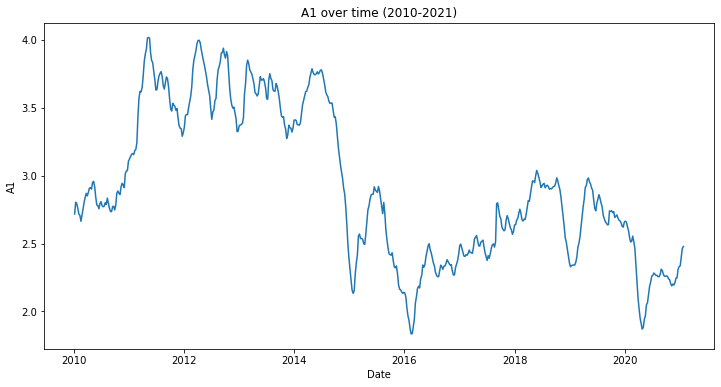

<Figure size 864x432 with 0 Axes>

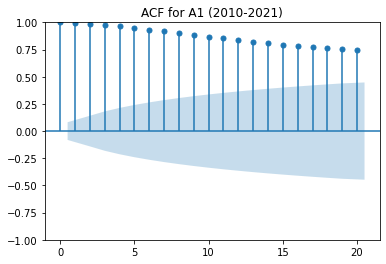

<Figure size 864x432 with 0 Axes>

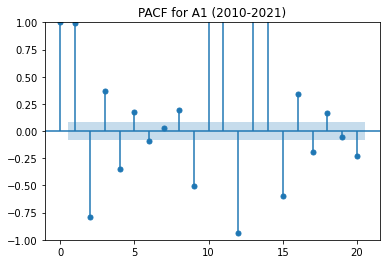

Augmented Dickey-Fuller Test Statistic for A1: -1.9249904276990355
P-value for A1: 0.32039767637749056
Fail to reject the null hypothesis. The series for A1 is likely non-stationary.

--------------------------------------------------



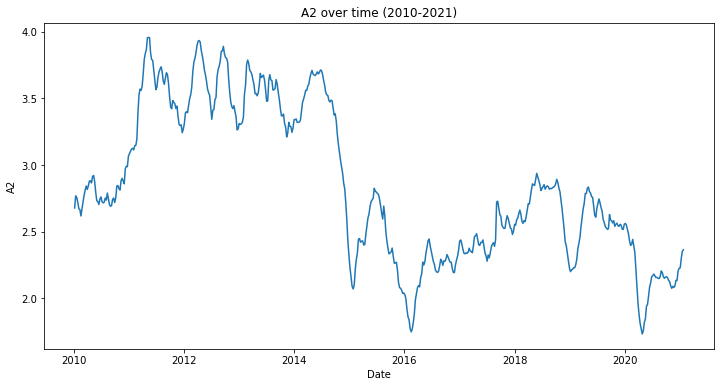

<Figure size 864x432 with 0 Axes>

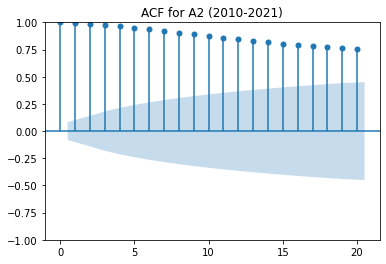

<Figure size 864x432 with 0 Axes>

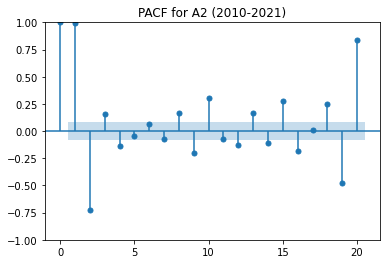

Augmented Dickey-Fuller Test Statistic for A2: -1.7877625825987724
P-value for A2: 0.3865539334049541
Fail to reject the null hypothesis. The series for A2 is likely non-stationary.

--------------------------------------------------



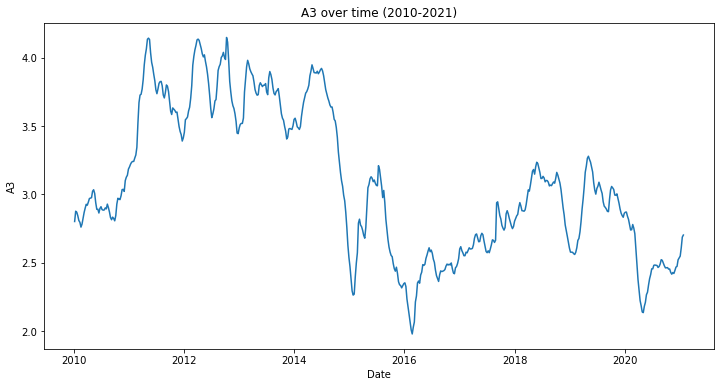

<Figure size 864x432 with 0 Axes>

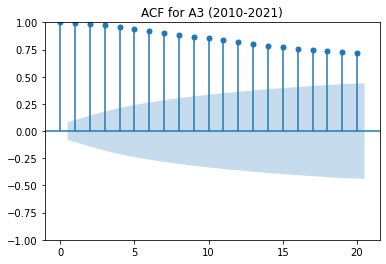

<Figure size 864x432 with 0 Axes>

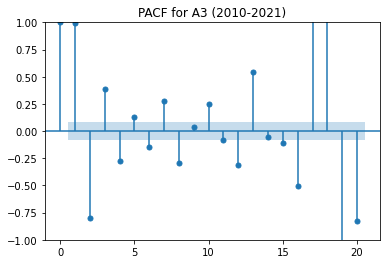

Augmented Dickey-Fuller Test Statistic for A3: -1.6403441101219713
P-value for A3: 0.4620809909069806
Fail to reject the null hypothesis. The series for A3 is likely non-stationary.

--------------------------------------------------



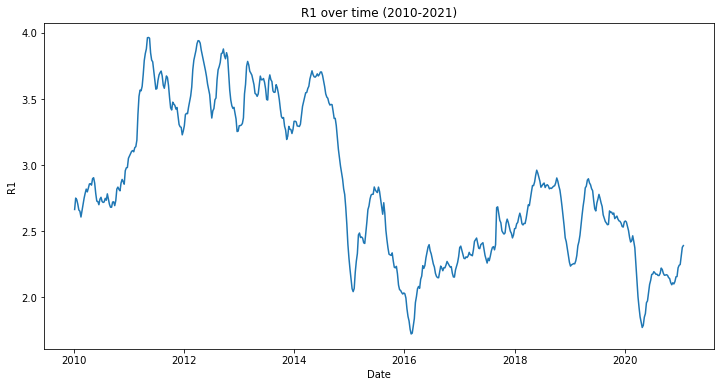

<Figure size 864x432 with 0 Axes>

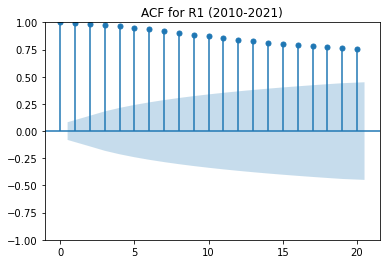

<Figure size 864x432 with 0 Axes>

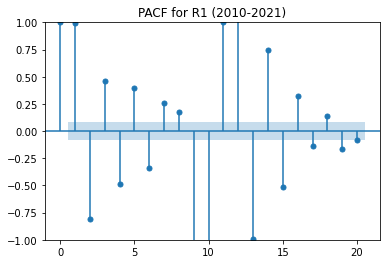

Augmented Dickey-Fuller Test Statistic for R1: -1.8896636140903234
P-value for R1: 0.3369391874456832
Fail to reject the null hypothesis. The series for R1 is likely non-stationary.

--------------------------------------------------



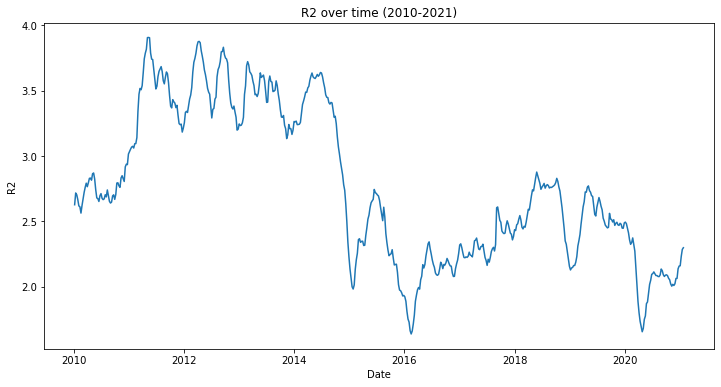

<Figure size 864x432 with 0 Axes>

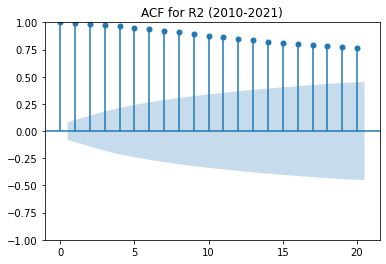

<Figure size 864x432 with 0 Axes>

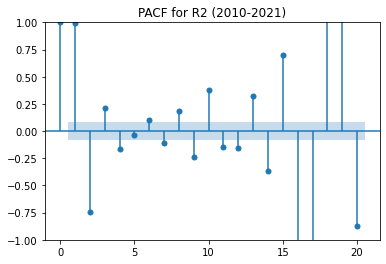

Augmented Dickey-Fuller Test Statistic for R2: -1.7712966548960727
P-value for R2: 0.39480231274807964
Fail to reject the null hypothesis. The series for R2 is likely non-stationary.

--------------------------------------------------



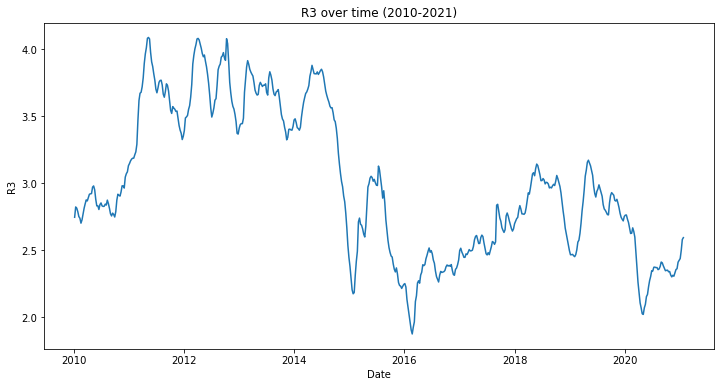

<Figure size 864x432 with 0 Axes>

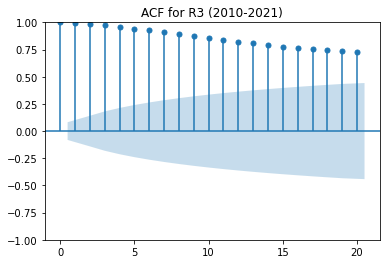

<Figure size 864x432 with 0 Axes>

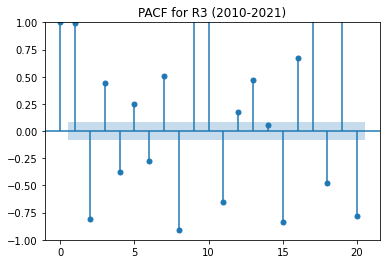

Augmented Dickey-Fuller Test Statistic for R3: -1.604572424536863
P-value for R3: 0.4812962174093192
Fail to reject the null hypothesis. The series for R3 is likely non-stationary.

--------------------------------------------------



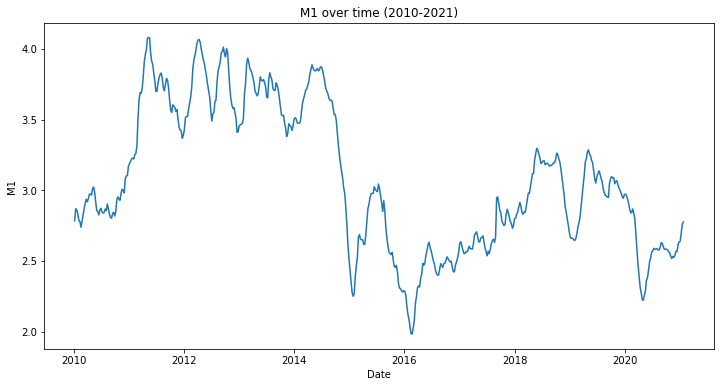

<Figure size 864x432 with 0 Axes>

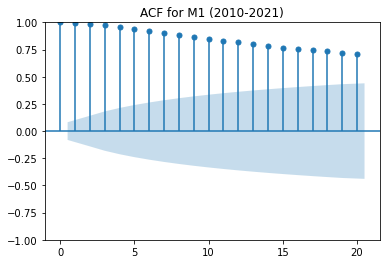

<Figure size 864x432 with 0 Axes>

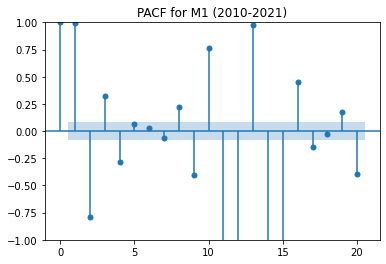

Augmented Dickey-Fuller Test Statistic for M1: -2.145137035122613
P-value for M1: 0.22675614813380646
Fail to reject the null hypothesis. The series for M1 is likely non-stationary.

--------------------------------------------------



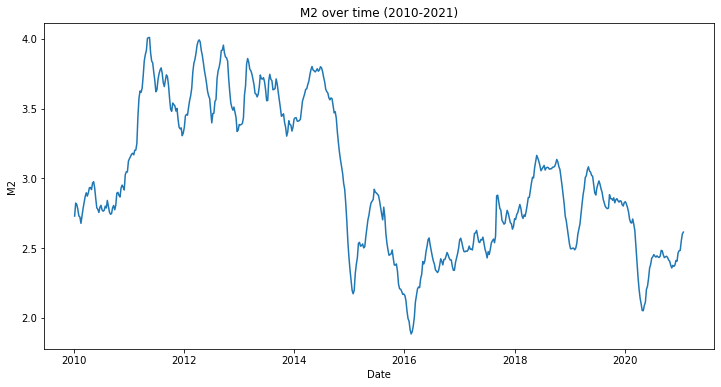

<Figure size 864x432 with 0 Axes>

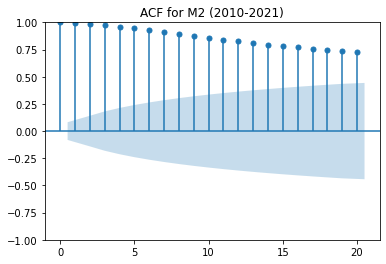

<Figure size 864x432 with 0 Axes>

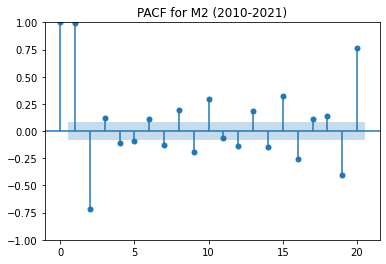

Augmented Dickey-Fuller Test Statistic for M2: -2.360180412480538
P-value for M2: 0.15329193109520828
Fail to reject the null hypothesis. The series for M2 is likely non-stationary.

--------------------------------------------------



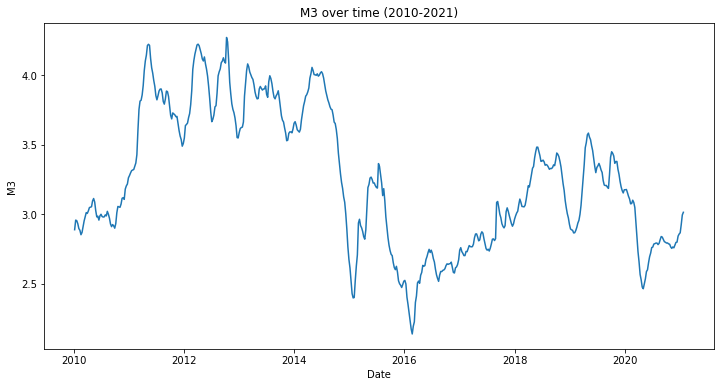

<Figure size 864x432 with 0 Axes>

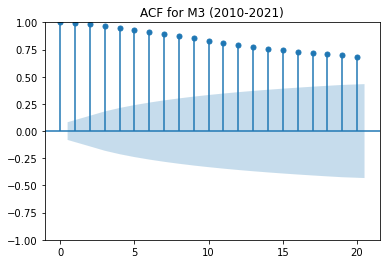

<Figure size 864x432 with 0 Axes>

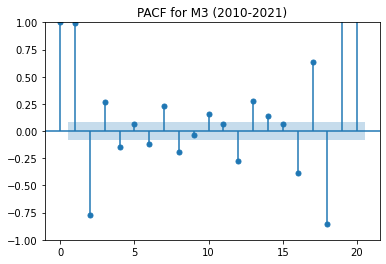

Augmented Dickey-Fuller Test Statistic for M3: -1.8209316408547471
P-value for M3: 0.37012034185737935
Fail to reject the null hypothesis. The series for M3 is likely non-stationary.

--------------------------------------------------



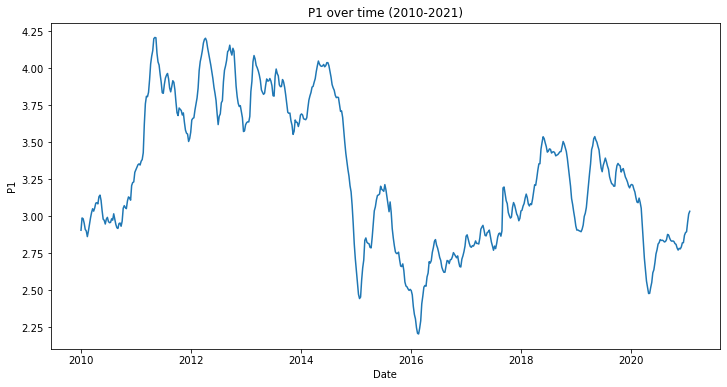

<Figure size 864x432 with 0 Axes>

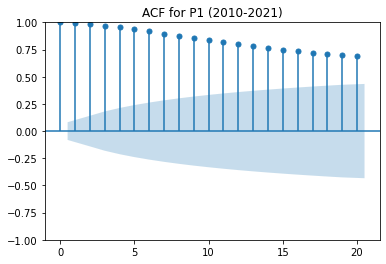

<Figure size 864x432 with 0 Axes>

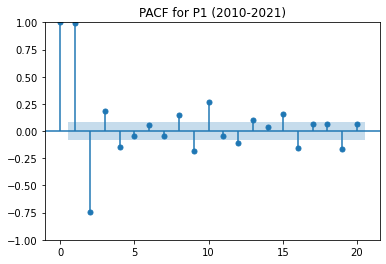

Augmented Dickey-Fuller Test Statistic for P1: -2.2762042129748417
P-value for P1: 0.17975746324641834
Fail to reject the null hypothesis. The series for P1 is likely non-stationary.

--------------------------------------------------



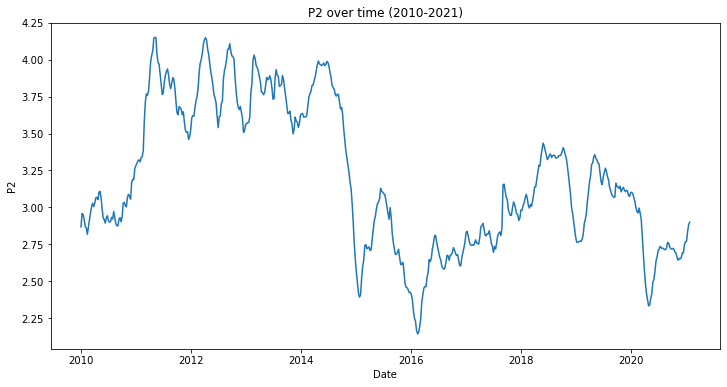

<Figure size 864x432 with 0 Axes>

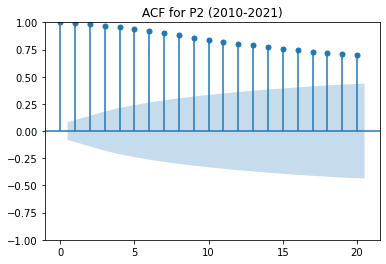

<Figure size 864x432 with 0 Axes>

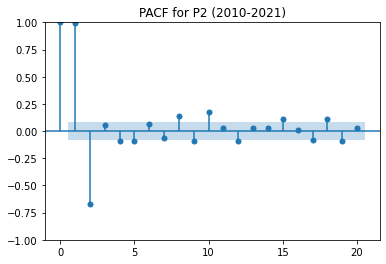

Augmented Dickey-Fuller Test Statistic for P2: -2.5442884337555234
P-value for P2: 0.10506686392445108
Fail to reject the null hypothesis. The series for P2 is likely non-stationary.

--------------------------------------------------



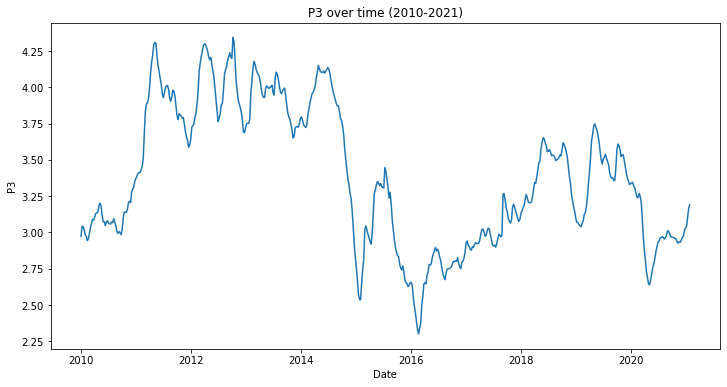

<Figure size 864x432 with 0 Axes>

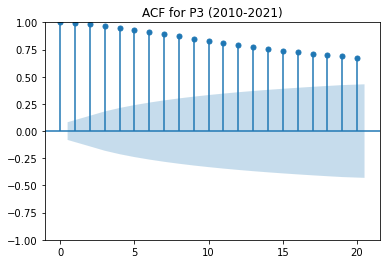

<Figure size 864x432 with 0 Axes>

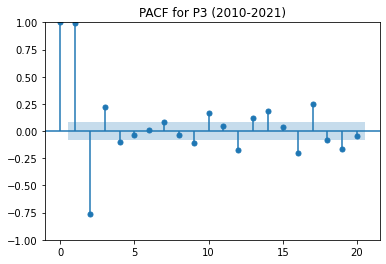

Augmented Dickey-Fuller Test Statistic for P3: -2.452175557351088
P-value for P3: 0.12754821499189695
Fail to reject the null hypothesis. The series for P3 is likely non-stationary.

--------------------------------------------------



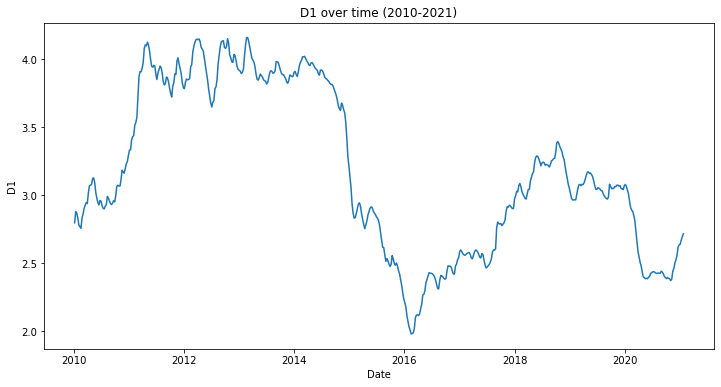

<Figure size 864x432 with 0 Axes>

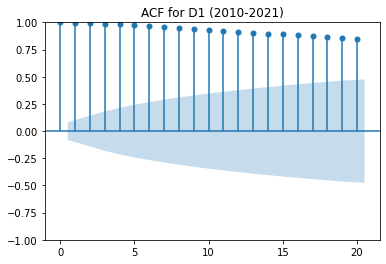

<Figure size 864x432 with 0 Axes>

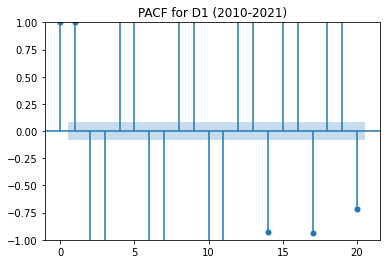

Augmented Dickey-Fuller Test Statistic for D1: -1.3183654627568508
P-value for D1: 0.6207287715690465
Fail to reject the null hypothesis. The series for D1 is likely non-stationary.

--------------------------------------------------



In [51]:
df_gas['Date'] = pd.to_datetime(df_gas['Date'], format='%m/%d/%Y')
df_gas_filtered = df_gas[(df_gas['Date'] >= '2010-01-01') & (df_gas['Date'] <= '2021-12-31')]
numeric_columns = df_gas_filtered.select_dtypes(include=np.number).columns

for column_of_interest in numeric_columns:
    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(df_gas_filtered['Date'], df_gas_filtered[column_of_interest])
    plt.title(f'{column_of_interest} over time (2010-2021)')
    plt.xlabel('Date')
    plt.ylabel(column_of_interest)
    plt.show()

    # ACF plot
    plt.figure(figsize=(12, 6))
    plot_acf(df_gas_filtered[column_of_interest].dropna(), lags=20, title=f'ACF for {column_of_interest} (2010-2021)')
    plt.show()

    # PACF plot
    plt.figure(figsize=(12, 6))
    plot_pacf(df_gas_filtered[column_of_interest].dropna(), lags=20, title=f'PACF for {column_of_interest} (2010-2021)')
    plt.show()

    #Augmented Dickey-Fuller test
    result_adf = adfuller(df_gas_filtered[column_of_interest].dropna())
    test_statistic, p_value, _, _, _, _ = result_adf
    print(f'Augmented Dickey-Fuller Test Statistic for {column_of_interest}: {test_statistic}')
    print(f'P-value for {column_of_interest}: {p_value}')

    if p_value <= 0.05:
        print(f'Reject the null hypothesis. The series for {column_of_interest} is likely stationary.')
    else:
        print(f'Fail to reject the null hypothesis. The series for {column_of_interest} is likely non-stationary.')

    print('\n' + '-'*50 + '\n')  # Separate results for different columns


Differencing

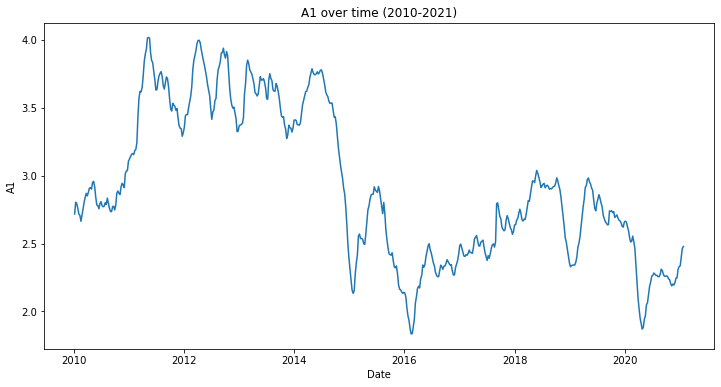

<Figure size 864x432 with 0 Axes>

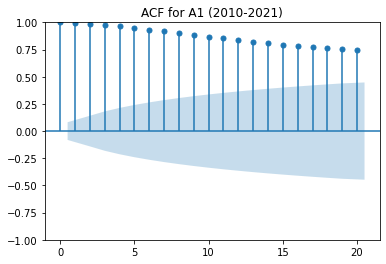

<Figure size 864x432 with 0 Axes>

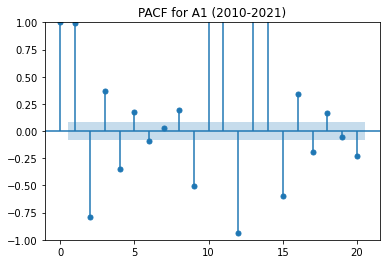

Augmented Dickey-Fuller Test Statistic for A1 after differencing: -12.5264358630662
P-value for A1 after differencing: 2.4827393879202433e-23
Reject the null hypothesis. The differenced series for A1 is likely stationary.

--------------------------------------------------



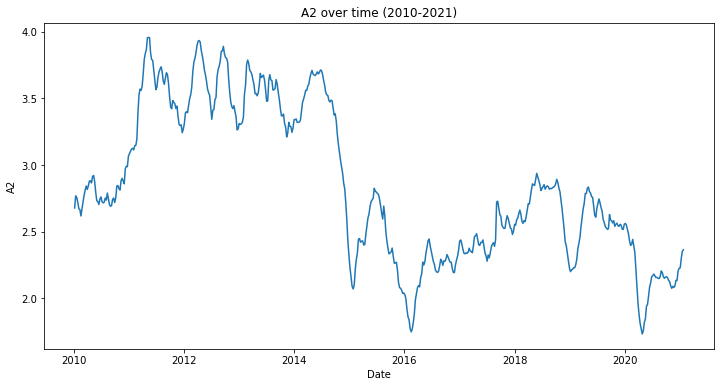

<Figure size 864x432 with 0 Axes>

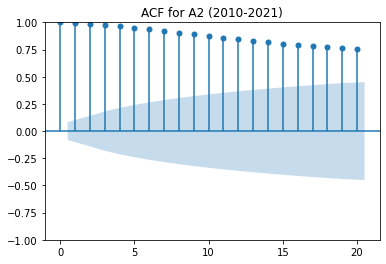

<Figure size 864x432 with 0 Axes>

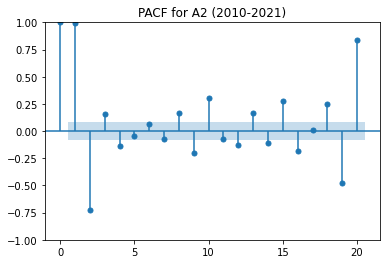

Augmented Dickey-Fuller Test Statistic for A2 after differencing: -13.406491660314915
P-value for A2 after differencing: 4.459809219241491e-25
Reject the null hypothesis. The differenced series for A2 is likely stationary.

--------------------------------------------------



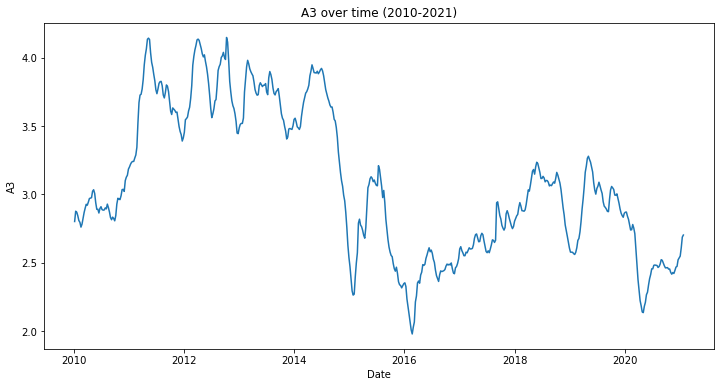

<Figure size 864x432 with 0 Axes>

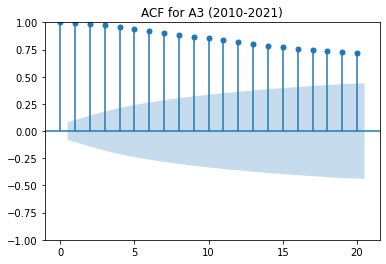

<Figure size 864x432 with 0 Axes>

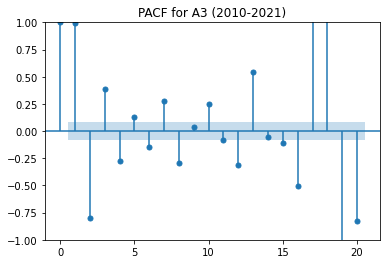

Augmented Dickey-Fuller Test Statistic for A3 after differencing: -7.33678488469061
P-value for A3 after differencing: 1.0912640260813831e-10
Reject the null hypothesis. The differenced series for A3 is likely stationary.

--------------------------------------------------



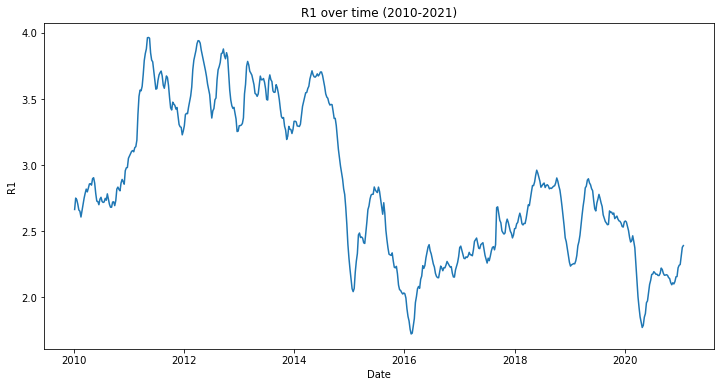

<Figure size 864x432 with 0 Axes>

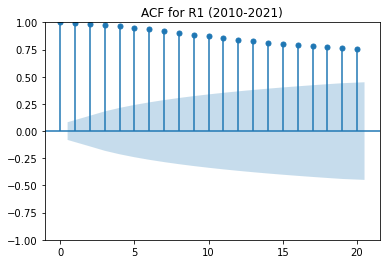

<Figure size 864x432 with 0 Axes>

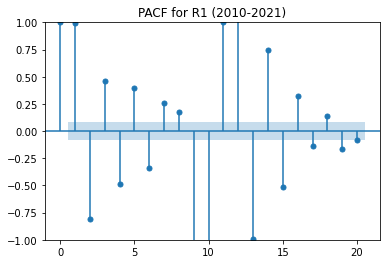

Augmented Dickey-Fuller Test Statistic for R1 after differencing: -12.622133938990554
P-value for R1 after differencing: 1.569842558697648e-23
Reject the null hypothesis. The differenced series for R1 is likely stationary.

--------------------------------------------------



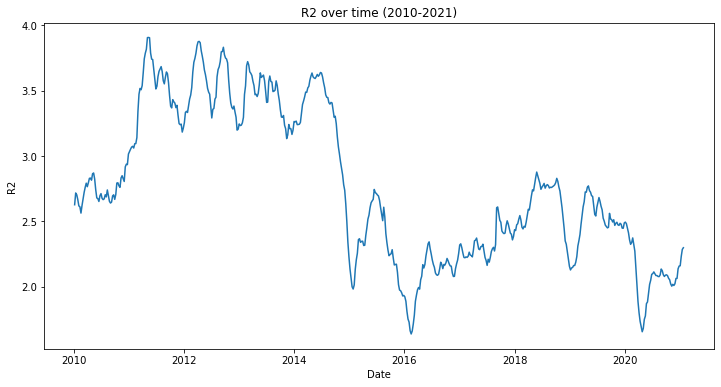

<Figure size 864x432 with 0 Axes>

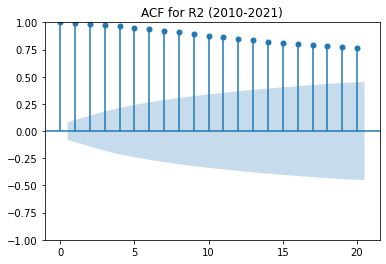

<Figure size 864x432 with 0 Axes>

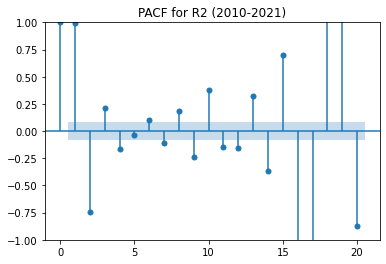

Augmented Dickey-Fuller Test Statistic for R2 after differencing: -13.48853055342093
P-value for R2 after differencing: 3.1392274076854508e-25
Reject the null hypothesis. The differenced series for R2 is likely stationary.

--------------------------------------------------



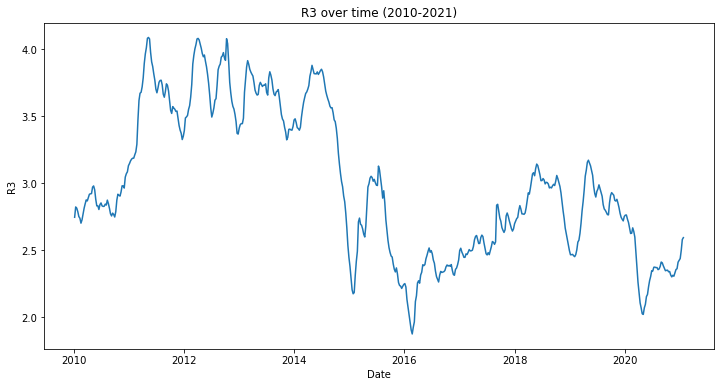

<Figure size 864x432 with 0 Axes>

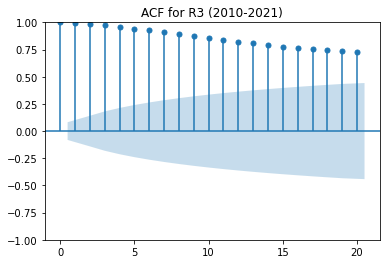

<Figure size 864x432 with 0 Axes>

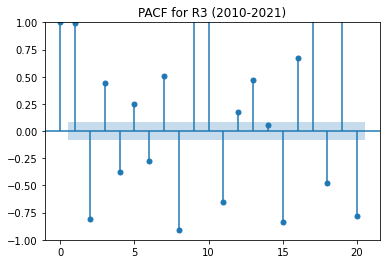

Augmented Dickey-Fuller Test Statistic for R3 after differencing: -7.314670516452747
P-value for R3 after differencing: 1.2382358555018472e-10
Reject the null hypothesis. The differenced series for R3 is likely stationary.

--------------------------------------------------



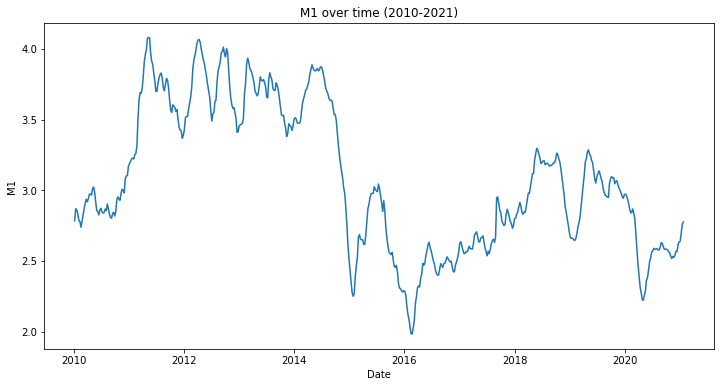

<Figure size 864x432 with 0 Axes>

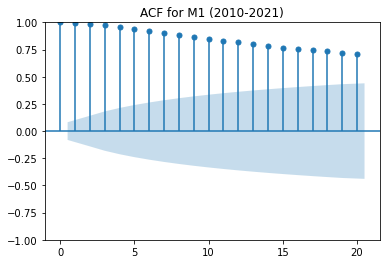

<Figure size 864x432 with 0 Axes>

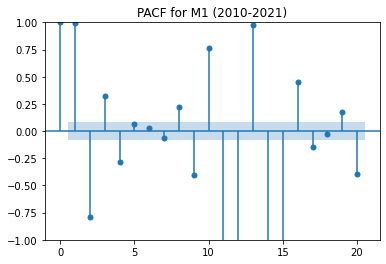

Augmented Dickey-Fuller Test Statistic for M1 after differencing: -12.240882490243226
P-value for M1 after differencing: 1.0032196551219034e-22
Reject the null hypothesis. The differenced series for M1 is likely stationary.

--------------------------------------------------



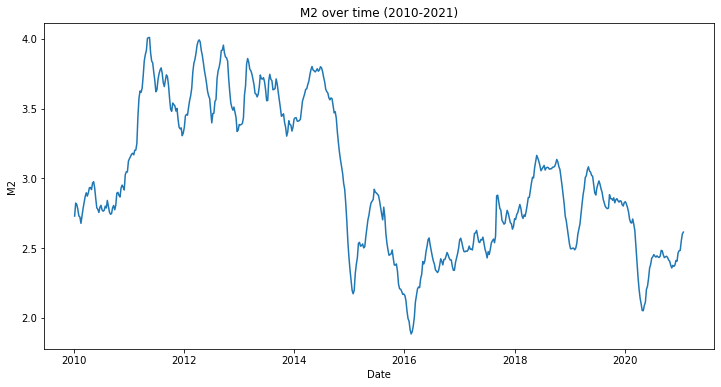

<Figure size 864x432 with 0 Axes>

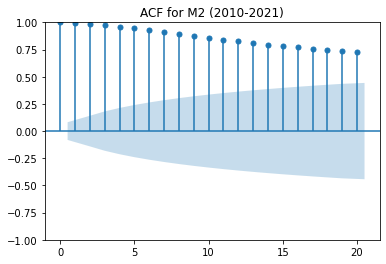

<Figure size 864x432 with 0 Axes>

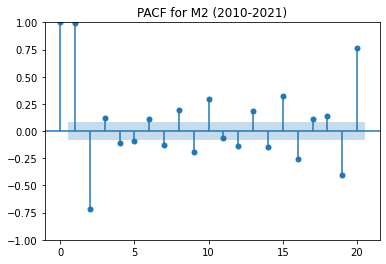

Augmented Dickey-Fuller Test Statistic for M2 after differencing: -13.232171637903656
P-value for M2 after differencing: 9.535866183156547e-25
Reject the null hypothesis. The differenced series for M2 is likely stationary.

--------------------------------------------------



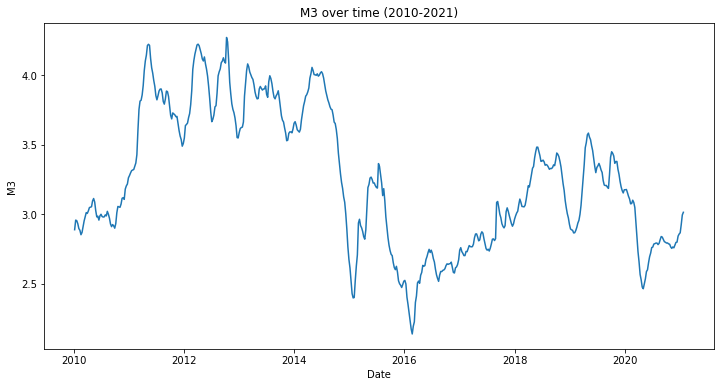

<Figure size 864x432 with 0 Axes>

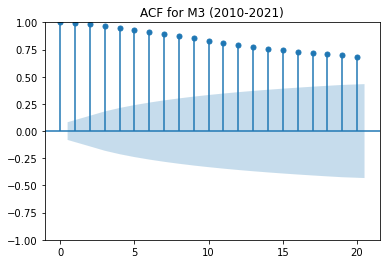

<Figure size 864x432 with 0 Axes>

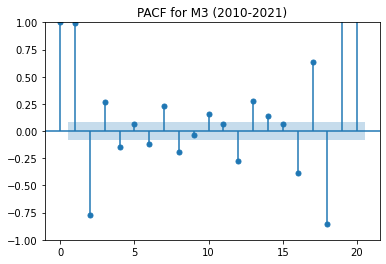

Augmented Dickey-Fuller Test Statistic for M3 after differencing: -7.429881365332864
P-value for M3 after differencing: 6.402221516053556e-11
Reject the null hypothesis. The differenced series for M3 is likely stationary.

--------------------------------------------------



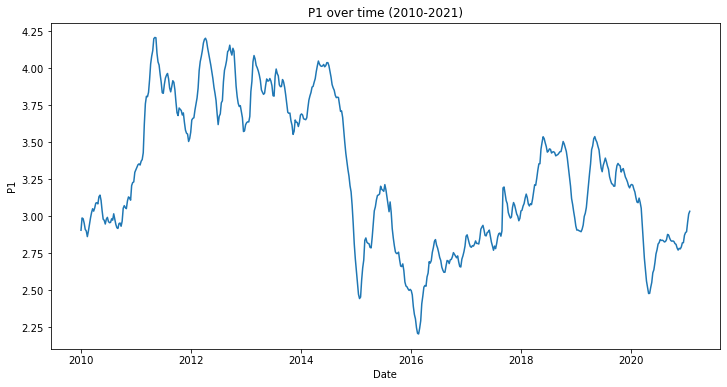

<Figure size 864x432 with 0 Axes>

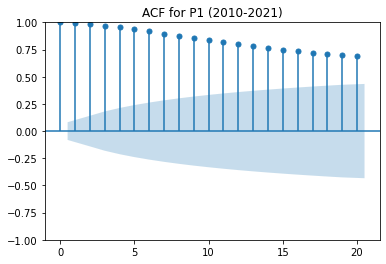

<Figure size 864x432 with 0 Axes>

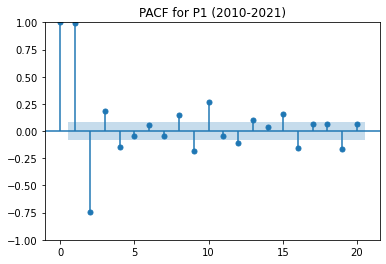

Augmented Dickey-Fuller Test Statistic for P1 after differencing: -12.142850965667005
P-value for P1 after differencing: 1.6358753992627313e-22
Reject the null hypothesis. The differenced series for P1 is likely stationary.

--------------------------------------------------



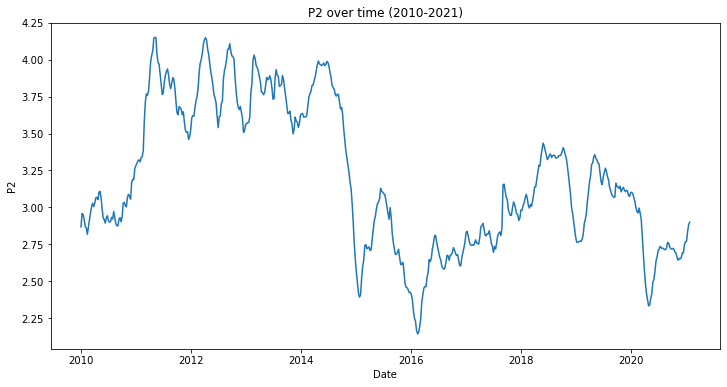

<Figure size 864x432 with 0 Axes>

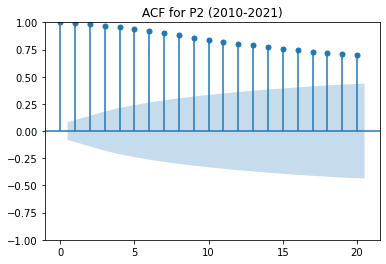

<Figure size 864x432 with 0 Axes>

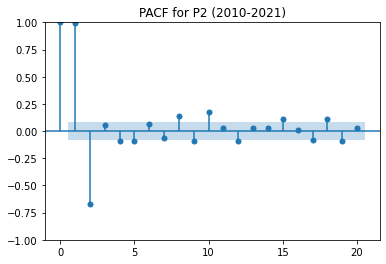

Augmented Dickey-Fuller Test Statistic for P2 after differencing: -13.102723571386639
P-value for P2 after differencing: 1.696826384743418e-24
Reject the null hypothesis. The differenced series for P2 is likely stationary.

--------------------------------------------------



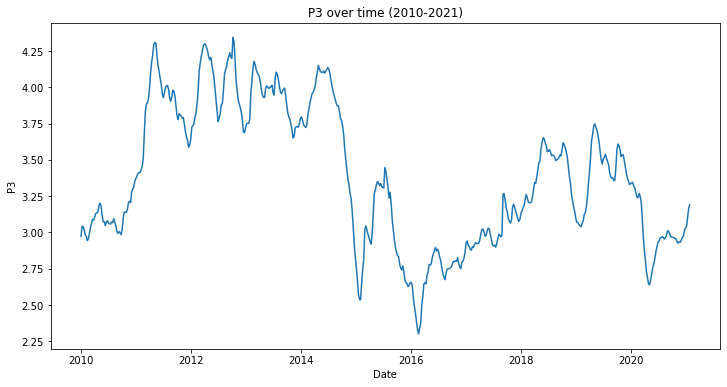

<Figure size 864x432 with 0 Axes>

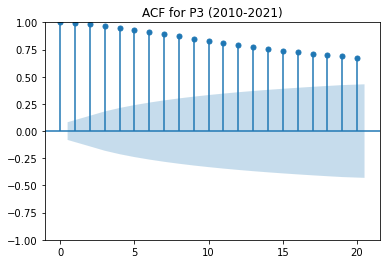

<Figure size 864x432 with 0 Axes>

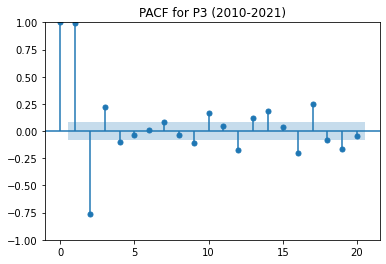

Augmented Dickey-Fuller Test Statistic for P3 after differencing: -11.61710258158833
P-value for P3 after differencing: 2.434015333422799e-21
Reject the null hypothesis. The differenced series for P3 is likely stationary.

--------------------------------------------------



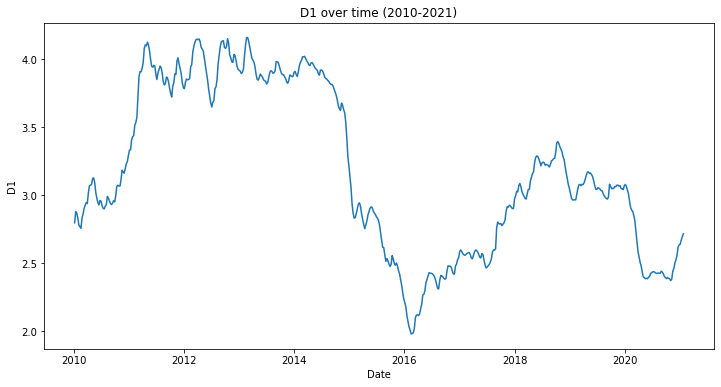

<Figure size 864x432 with 0 Axes>

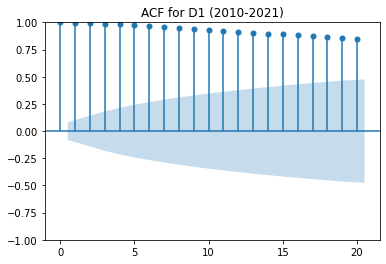

<Figure size 864x432 with 0 Axes>

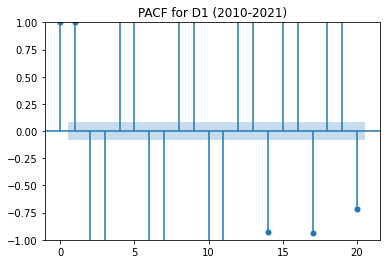

Augmented Dickey-Fuller Test Statistic for D1 after differencing: -12.13733269773549
P-value for D1 after differencing: 1.6817640477736156e-22
Reject the null hypothesis. The differenced series for D1 is likely stationary.

--------------------------------------------------



In [52]:
numeric_columns = df_gas_filtered.select_dtypes(include=np.number).columns
for column_of_interest in numeric_columns:
    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(df_gas_filtered['Date'], df_gas_filtered[column_of_interest])
    plt.title(f'{column_of_interest} over time (2010-2021)')
    plt.xlabel('Date')
    plt.ylabel(column_of_interest)
    plt.show()

    # ACF plot
    plt.figure(figsize=(12, 6))
    plot_acf(df_gas_filtered[column_of_interest].dropna(), lags=20, title=f'ACF for {column_of_interest} (2010-2021)')
    plt.show()

    # PACF plot
    plt.figure(figsize=(12, 6))
    plot_pacf(df_gas_filtered[column_of_interest].dropna(), lags=20, title=f'PACF for {column_of_interest} (2010-2021)')
    plt.show()
    # Perform differencing
    df_diff = df_gas_filtered[column_of_interest].diff().dropna()

    # Perform Augmented Dickey-Fuller test - differenced series
    result_adf = adfuller(df_diff)
    test_statistic, p_value, _, _, _, _ = result_adf
    print(f'Augmented Dickey-Fuller Test Statistic for {column_of_interest} after differencing: {test_statistic}')
    print(f'P-value for {column_of_interest} after differencing: {p_value}')

    # Interpret the results
    if p_value <= 0.05:
        print(f'Reject the null hypothesis. The differenced series for {column_of_interest} is likely stationary.')
    else:
        print(f'Fail to reject the null hypothesis. The differenced series for {column_of_interest} is likely non-stationary.')

    print('\n' + '-'*50 + '\n')  # Separate results for different columns


Hence, we got the stationary.

Here I have selected only One gasoline , so that it won't be complex

In [53]:
df_gas['Date'] = pd.to_datetime(df_gas['Date'])
df_gas.set_index('Date', inplace=True)

ARIMA:

In [54]:
# Define the range for p and q values to iterate over for the ARIMA model
p_range = range(4)  # p values (AR order)
q_range = range(4)  # q values (MA order)
d = 1  # Differencing order is already done and set to 1

In [55]:
# Initialize lists to store the results
aic_values = []
p_order = []
q_order = []


In [56]:
# Iterate over all combinations of p and q to find the best ARIMA model based on AIC
for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(df_gas['R1'], order=(p, d, q))  # df_gas['R1'] should be the column after differencing
            model_fit = model.fit()
            # Store results
            aic_values.append(model_fit.aic)
            p_order.append(p)
            q_order.append(q)
        except Exception as e:
            print(f'ARIMA({p}, {d}, {q}) could not be fitted: {e}')
            aic_values.append(np.nan)  # Append NaN if the model could not be fitted
            p_order.append(p)
            q_order.append(q)


In [57]:
# Create a DataFrame with the results
aic_df = pd.DataFrame({
    'p': p_order,
    'q': q_order,
    'aic': aic_values
})

In [58]:
# Find the best model with the lowest AIC
best_aic_idx = aic_df['aic'].idxmin()
best_p = aic_df.loc[best_aic_idx, 'p']
best_q = aic_df.loc[best_aic_idx, 'q']
best_aic = aic_df.loc[best_aic_idx, 'aic']


In [59]:
# Print the best ARIMA order and AIC
print(f"Best ARIMA Model Order: (p={best_p}, d={d}, q={best_q}) with AIC: {best_aic}")

Best ARIMA Model Order: (p=3, d=1, q=2) with AIC: -4855.227482053084


Here the best model is ARIMA (p=3, d=1, q=2) with AIC: -4855.227482053084

In [60]:
# Fit the best ARIMA model
best_model = ARIMA(df_gas['R1'], order=(best_p, d, best_q))
best_model_fit = best_model.fit()

In [61]:
# Print the summary of the best ARIMA model
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     R1   No. Observations:                 1361
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2433.614
Date:                Sat, 16 Dec 2023   AIC                          -4855.227
Time:                        23:33:22   BIC                          -4823.936
Sample:                    01-02-1995   HQIC                         -4843.513
                         - 01-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9129      0.095      9.626      0.000       0.727       1.099
ar.L2         -0.8974      0.121     -7.396      0.000      -1.135      -0.660
ar.L3          0.4544      0.043     10.577      0.0

Above summary shows the coefficients of the ARIMA(3,1,2) model. It can be observed that allthe coefficients of this model are significant. Performing residual analysis to check it the model isa good fit.

Ljungbox test

Residual Analysis of ARIMA(3,1,2)

In [66]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(best_model_fit.resid)


lb_stat  lb_pvalue
1   0.001415   0.969996
2   0.008787   0.995616
3   0.198755   0.977790
4   0.359641   0.985646
5   0.847835   0.973882
6   1.458891   0.962178
7   2.278200   0.942853
8   2.889204   0.941117
9   4.147903   0.901411
10  4.353596   0.929989

In [75]:
residuals= best_model_fit.resid

<AxesSubplot:>

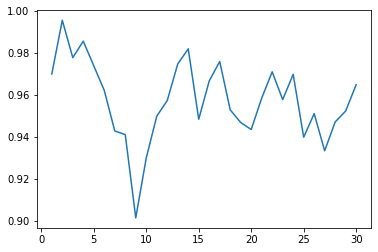

In [76]:
sm.stats.acorr_ljungbox(residuals, lags = 30)['lb_pvalue'].plot()

This shows that there is nocorrelation amongst the residuals. This can also be confirmed by checking the ACF and PACFplots of the residuals.

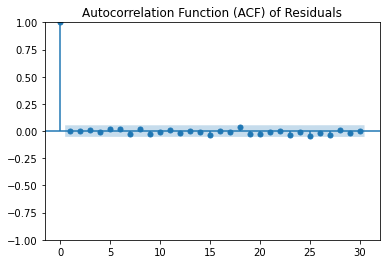

In [77]:
plot_acf(residuals, lags=30)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

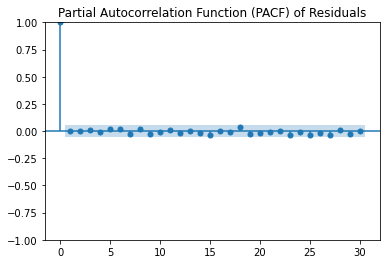

In [78]:
plot_pacf(residuals, lags=30)
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.show()

None of the lags are significant which confirms that there in no correlation within the residuals

FORECASTING:

In [80]:
forecast = best_model_fit.get_forecast(steps=10)
forecast_df = forecast.summary_frame()

print(forecast_df)

R1              mean   mean_se  mean_ci_lower  mean_ci_upper
2021-02-01  2.405196  0.040443       2.325929       2.484464
2021-02-08  2.419833  0.073369       2.276032       2.563634
2021-02-15  2.427259  0.103676       2.224058       2.630460
2021-02-22  2.426898  0.133416       2.165408       2.688388
2021-03-01  2.426555  0.162286       2.108481       2.744629
2021-03-08  2.429940  0.188520       2.060447       2.799432
2021-03-15  2.433173  0.211771       2.018110       2.848237
2021-03-22  2.432932  0.233187       1.975893       2.889971
2021-03-29  2.431348  0.253642       1.934219       2.928476
2021-04-05  2.431587  0.273005       1.896506       2.966668


In [83]:
history = [x for x in df['R1']]
predictions = list()
# Define the number of steps you want to forecast ahead
steps = 10
observed_values = [history[-1] for _ in range(steps)] 
for t in range(steps):
    model = ARIMA(history, order=(3,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = history[-1]  # Here you should add the new observation from actual data
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2.405196, expected=2.392000
predicted=2.399656, expected=2.392000
predicted=2.391279, expected=2.392000
predicted=2.387362, expected=2.392000
predicted=2.390355, expected=2.392000
predicted=2.396484, expected=2.392000
predicted=2.394674, expected=2.392000
predicted=2.389338, expected=2.392000
predicted=2.389559, expected=2.392000
predicted=2.391880, expected=2.392000


Above  shows the forecasts from the fitted ARIMA model. ARIMA(3,1,2) is the best model.
